# Turbofan Engine Degradation Simulation
Cet ensemble de données contient des simulations de dégradation de moteurs à turbofan sous différentes conditions opérationnelles et modes de panne. Les signaux de capteurs enregistrent l'évolution des pannes.

Engine degradation simulation was carried out using the Commercial Modular Aero-Propulsion System Simulation (C-MAPSS). Four different sets were simulated under different combinations of operational conditions and fault modes. This records several sensor channels to characterize fault evolution. The data set was provided by the NASA Ames Prognostics Center of Excellence (PCoE).

- Download: https://data.nasa.gov/Aeorspace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6  
- Download Mirror: https://phm-datasets.s3.amazonaws.com/NASA/6.+Turbofan+Engine+Degradation+Simulation+Data+Set.zip
- Data Set Citation: A. Saxena and K. Goebel (2008). “Turbofan Engine Degradation Simulation Data Set”, NASA Prognostics Data Repository, NASA Ames Research Center, Moffett Field, CA

In [89]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram
from io import BytesIO
import cv2
from scipy.fft import fftshift

In [19]:
# Définir les chemins des répertoires de données
data_dir = "Data"
train_dir = os.path.join(data_dir, "train")
rul_dir = os.path.join(data_dir, "RUL")
test_dir = os.path.join(data_dir, "test")

# Lister les fichiers dans chaque répertoire
train_files = os.listdir(train_dir)
rul_files = os.listdir(rul_dir)
test_files = os.listdir(test_dir)

# Fonction pour charger les données
def load_data(file_path, columns):
    return pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)

# Définir les colonnes pour les fichiers train et test
columns = [
    'unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 'operational_setting_3',
    'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4',
    'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8',
    'sensor_measurement_9', 'sensor_measurement_10', 'sensor_measurement_11', 'sensor_measurement_12',
    'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_16',
    'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20',
    'sensor_measurement_21', 'sensor_measurement_22', 'sensor_measurement_23', 'sensor_measurement_24',
    'sensor_measurement_25', 'sensor_measurement_26'
]

# Exemple de chargement des données de train et test pour FD001
#train_fd1 = load_data(os.path.join(train_dir, 'train_FD001.txt'), columns)
#test_fd1 = load_data(os.path.join(test_dir, 'test_FD001.txt'), columns)

# Charger les données RUL
#rul_fd1 = pd.read_csv(os.path.join(rul_dir, 'RUL_FD001.txt'), header=None, names=['RUL'])

train_fd = []
for files in train_files :
    train_data = load_data(os.path.join(train_dir, files), columns)
    train_fd.append(train_data)

rul_fd = []
for files in rul_files :
    rul_data = pd.read_csv(os.path.join(rul_dir, files), header=None, names=['RUL'])
    rul_fd.append(rul_data)

C:\Users\PC de MEDUSA\AppData\Local\Temp\ipykernel_10972\3110599596.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
C:\Users\PC de MEDUSA\AppData\Local\Temp\ipykernel_10972\3110599596.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
C:\Users\PC de MEDUSA\AppData\Local\Temp\ipykernel_10972\3110599596.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(file_path, delim_whitespace=True, header=None, names=columns)
C:\Users\PC de MEDUSA\AppData\Local\Temp\ipykernel_10972\3110599596.py:14: FutureWarning: The 'delim

In [39]:
train_fd[0]

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,sensor_measurement_24,sensor_measurement_25,sensor_measurement_26
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,392,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,392,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,390,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,392,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,393,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,397,2388,100.0,38.49,22.9735,NaN,NaN,NaN,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,395,2388,100.0,38.30,23.1594,NaN,NaN,NaN,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,398,2388,100.0,38.44,22.9333,NaN,NaN,NaN,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,395,2388,100.0,38.29,23.0640,NaN,NaN,NaN,NaN,NaN


In [43]:
train_fd[0].groupby('unit_number').count()
#pd.unique(train_fd[0]['unit_number'])

,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,...,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,sensor_measurement_24,sensor_measurement_25,sensor_measurement_26
unit_number,,,,,,,,,,,,,,,,,,,,,
1,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,0,0,0,0,0
2,287,287,287,287,287,287,287,287,287,287,...,287,287,287,287,287,0,0,0,0,0
3,179,179,179,179,179,179,179,179,179,179,...,179,179,179,179,179,0,0,0,0,0
4,189,189,189,189,189,189,189,189,189,189,...,189,189,189,189,189,0,0,0,0,0
5,269,269,269,269,269,269,269,269,269,269,...,269,269,269,269,269,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,336,336,336,336,336,336,336,336,336,336,...,336,336,336,336,336,0,0,0,0,0
97,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,0,0,0,0,0
98,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,0,0,0,0,0


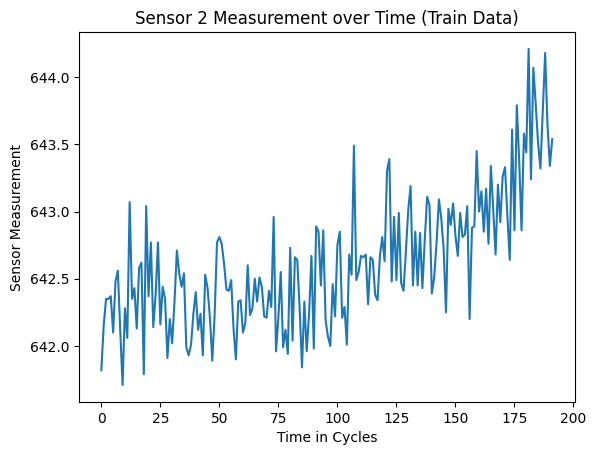

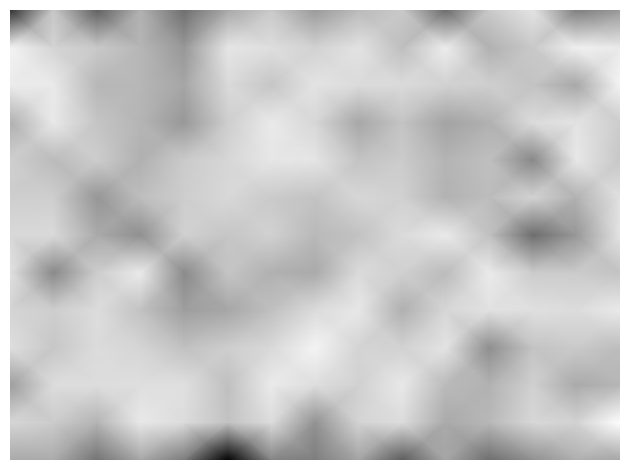

In [218]:
sensor_column = f'sensor_measurement_{2}'

data = train_fd[0]
unit_data = data[data['unit_number'] == 1]

# Générer le spectrogramme
signal = unit_data[sensor_column].values
signal = np.nan_to_num(signal, nan=0.0)

if len(signal) != 0 and not np.all(signal == signal[0]):
    #plt.figure(figsize=(10, 6))
    plt.plot(signal)
    plt.title(f'Sensor {sensor} Measurement over Time (Train Data)')
    plt.xlabel('Time in Cycles')
    plt.ylabel('Sensor Measurement')
    plt.show()

    #f, t, Sxx = spectrogram(signal, fs=1, nperseg=len(signal), noverlap=len(signal)//2)
    f, t, Sxx = spectrogram(signal, fs=1, nperseg=len(signal)//8, noverlap=len(signal)//16)

    Sxx[Sxx == 0] = 1e-10

    # Spectrogramme sans fftshift
    #plt.figure(figsize=(5, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='gray')
    #plt.title(f'Unit {unit_number}, Sensor {sensor} (Sans fftshift)')
    #plt.xlabel('Time [s]')
    #plt.ylabel('Frequency [Hz]')
    #plt.colorbar(label='Intensity [dB]')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [208]:
# Fonction pour générer et afficher les spectrogrammes avec ajustements
def plot_spectrograms(fd, unit_number):
    for sensor in range(1, 27):  # 1 to 26
        sensor_column = f'sensor_measurement_{sensor}'

        data = train_fd[fd]
        unit_data = data[data['unit_number'] == unit_number]

        # Générer le spectrogramme
        signal = unit_data[sensor_column].values
        signal = np.nan_to_num(signal, nan=0.0)

        if len(signal) != 0 and not np.all(signal == signal[0]):
            plt.figure(figsize=(10, 6))
            plt.plot(signal)
            plt.title(f'Sensor {sensor} Measurement over Time (Train Data)')
            plt.xlabel('Time in Cycles')
            plt.ylabel('Sensor Measurement')
            plt.show()

            #f, t, Sxx = spectrogram(signal, fs=1, nperseg=len(signal), noverlap=len(signal)//2)
            f, t, Sxx = spectrogram(signal, fs=1, nperseg=len(signal)//8, noverlap=len(signal)//16)

            Sxx[Sxx == 0] = 1e-10

            # Spectrogramme sans fftshift
            plt.figure(figsize=(10, 4))
            plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='gray')
            plt.title(f'Unit {unit_number}, Sensor {sensor} (Sans fftshift)')
            plt.xlabel('Time [s]')
            plt.ylabel('Frequency [Hz]')
            plt.colorbar(label='Intensity [dB]')
            plt.show()


# Vérification

In [200]:
data = train_fd[0]

# Filtrer les données pour une unité spécifique (par exemple, unité 1)
unit_number = 1
unit_data = data[data['unit_number'] == unit_number]

sensor = 5
sensor_column = f'sensor_measurement_{sensor}'
        
# Générer le spectrogramme
signal = unit_data[sensor_column].values
signal = np.nan_to_num(signal, nan=0.0)


In [201]:
signal

array([14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62, 14.62,
       14.62, 14.62,

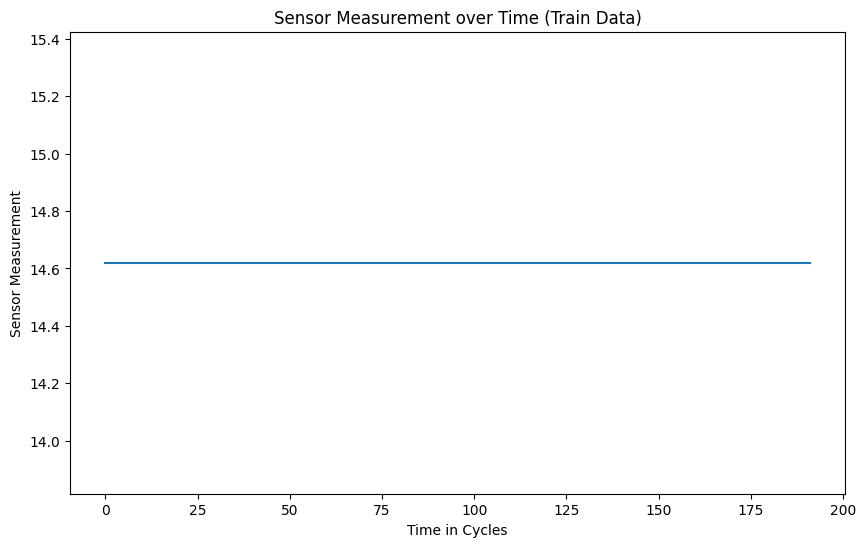

In [202]:
# Exemple de visualisation d'une mesure de capteur

plt.figure(figsize=(10, 6))
#plt.plot(train_fd1[:192]['time_in_cycles'], train_fd1[:192]['sensor_measurement_8'])
plt.plot(signal)
plt.title('Sensor Measurement over Time (Train Data)')
plt.xlabel('Time in Cycles')
plt.ylabel('Sensor Measurement')
plt.show()

In [203]:
if len(signal) != 0 and not np.all(signal == signal[0]):
    print("signal")
else:
    print("rien")

rien


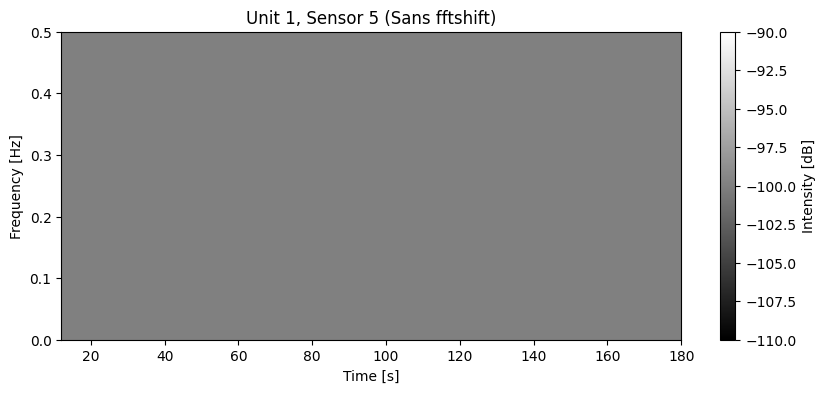

In [204]:
#f, t, Sxx = spectrogram(signal, fs=1, nperseg=len(signal), noverlap=len(signal)//2)
f, t, Sxx = spectrogram(signal, fs=1, nperseg=len(signal)//8, noverlap=len(signal)//16)

Sxx[Sxx == 0] = 1e-10

# Spectrogramme sans fftshift
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='gray')
plt.title(f'Unit {unit_number}, Sensor {sensor} (Sans fftshift)')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Intensity [dB]')
plt.show()

# Entraîner le Modèle

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torch.utils.data import DataLoader, Dataset

# Définir un dataset personnalisé
class SpectrogramDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_files = os.listdir(image_dir)
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        # Placeholder pour les labels, à remplacer par les vrais labels
        label = 0  # Exemple : Utiliser la RUL ou une étiquette binaire (panne ou non-panne)
        return image, label

# Transformer pour les images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Charger les données
dataset = SpectrogramDataset(output_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Exemple de modèle Vision Transformer (ViT) avec PyTorch
from torchvision.models import vit_b_16

model = vit_b_16(pretrained=True)
model.heads = torch.nn.Linear(model.heads.in_features, 2)  # Adapter la couche de sortie selon le nombre de classes (par exemple, panne ou non-panne)

# Entraînement du modèle (placeholder, ajuster selon votre pipeline d'entraînement)
criterion = torch.nn.CrossEntropyLoss()  # Ou une autre fonction de perte adaptée
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Exemple de boucle d'entraînement
for epoch in range(10):  # Nombre d'époques, à ajuster
    for images, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Prédiction

In [ ]:
def predict(model, image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)  # Ajouter une dimension batch
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return predicted.item()

# Exemple d'utilisation
new_image_path = 'path_to_new_spectrogram_image.png'
prediction = predict(model, new_image_path)
print(f'Prediction: {prediction}')  # 0 ou 1 selon votre définition des labels
